# 2d logistic regression scratchpad 

In [6]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../utils')            # append our utility names
%matplotlib inline

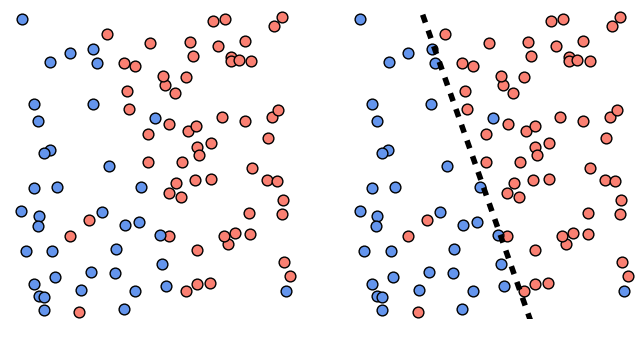

In [7]:
# load in the data and labels
data = np.asarray(pd.read_csv('../datasets/classif_2class_linear_data.csv'))
x = data[:,:-1]
y = data[:,-1]

# load in the true polynomial separator
true_func = np.asarray(pd.read_csv('../datasets/classif_2class_linear_func.csv'))

# plot the data and true underlying data-generating function
import classification_level_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.classify_cust_plt_util(x,y,true_func)
plt.show()

# logistic regression functionality

TODO: put in your logistic regression functionality below and run it on the above dataset!  Then plot the resulting boundary using the Python cell in the next section.

In [8]:
def compute_cost_val(x,y,w):
    P = len(y)
    cost = 0
    for p in range(P):
        x_p = list(x[p])
        x_p.insert(0,1)
        x_p = np.array(x_p)
        x_p.shape = (len(x_p),1)
        
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*np.dot(x_p.T,w)))
    return cost[0]

In [9]:
# function for computing the logistic regression cost gradient
def compute_gradient(x,y,w):
    # produce gradient for each class weights
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = list(x[p])
        x_p.insert(0,1)
        x_p = np.array(x_p)
        x_p.shape = (len(x_p),1)
        
        y_p = y[p]
        grad+= -1/(1 + np.exp(y_p*np.dot(x_p.T,w)))*y_p*x_p
    
    grad.shape = (len(grad),1)
    return grad

In [10]:
# gradient descent function for softmax cost/logistic regression 
def gradient_descent(x,y,w,alpha,K):
    # container for weight history
    whist = []
    
    # grad descent loop
    for j in range(K):
        # update container
        whist.append(w)
        
        # compute gradient
        grad = compute_gradient(x,y,w)
        w = w - alpha*grad;

        # update iteration count
    return whist

In [11]:
# set inputs to grad descent
alpha = 10**-2
K = 200
w = np.random.randn(np.shape(x)[1] + 1,1);        # random initial point

# run gradient descent
whist = gradient_descent(x,y,w,alpha,K)

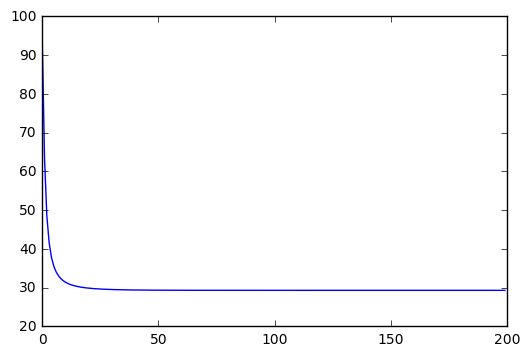

In [12]:
# print out the cost history
ghist = []
for k in range(K):
    w_k = whist[k]
    g_k = compute_cost_val(x,y,w_k)
    ghist.append(g_k)
plt.plot(ghist)
plt.show()

## Plot your learned boundary!

You shouldn't need to do anything in order for the next Python cell - which plots the learned boundary on the dataset - to work.  Except - of course - successfully running gradient descent for logistic regression.

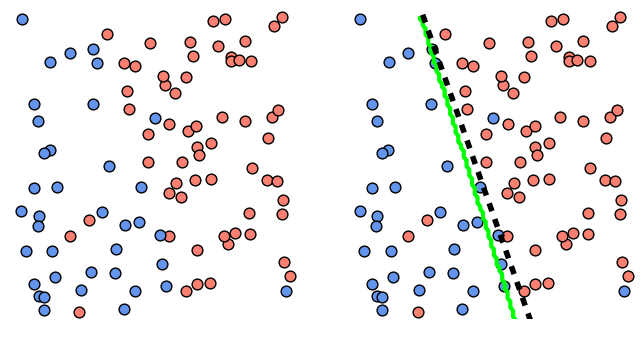

In [13]:
# print out the classifier boundary
utils.classify_cust_plt_util(x,y,true_func)

### print out boundary ###
# create plotting range
r = np.linspace(-2,2,100)

# create grid from plotting range
xx,yy= np.meshgrid(r,r)
xx.shape = (len(r)**2,1)
yy.shape = (len(r)**2,1)

# produce plane
w = whist[-1]
t = np.sign(w[0] + w[1]*xx + w[2]*yy)

# plot cost surface
xx.shape = (len(r),len(r))
yy.shape = (len(r),len(r))
t.shape = (len(r),len(r))
plt.contour(xx,yy,t,colors = 'lime',linewidths = 3,levels = [0])
plt.show()